In [1]:
import os,random,glob,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ORI = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\originals\\PAMAP2\\Protocol\\*.dat'
DATA_DIR = 'C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\frankDataset\\'
datasetList = ['Dsads','Ucihar','Uschad','Pamap2']
n_classes = 4 

### Analysig the Original Dataset:

In [69]:
x_axis = []
subj = {}
for file in glob.glob(DATA_ORI):
    print(file)
    subj[file.split('.')[0][-4:]] = [ ]
    with open(file) as f:
        lines = f.readlines()
    for line in lines:
        #get the x axis of the second Acc
        l = line.split(' ')
        act =int(l[1]) 
        if act == 1 or act == 4 or act == 12 or act == 13:
            subj[file.split('.')[0][-4:]].append(float(l[7]))


C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject101.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject102.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject103.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject104.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject105.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject106.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject107.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject108.dat
C:\Users\gcram\Documents\Smart Sense\Datasets\originals\PAMAP2\Protocol\subject109.dat


c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

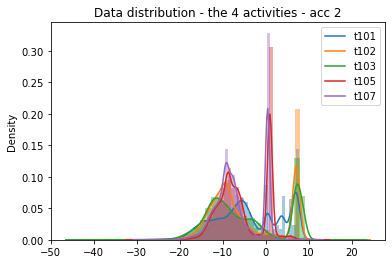

In [75]:
sub_sele = ['t101','t102','t103','t105','t107']
fig, axs = plt.subplots(1,1)
for k,v in subj.items():
    if k in sub_sele:
        sns.distplot(v,ax = axs)
axs.set_title('Data distribution - the 4 activities - acc 2')
axs.legend(sub_sele)

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


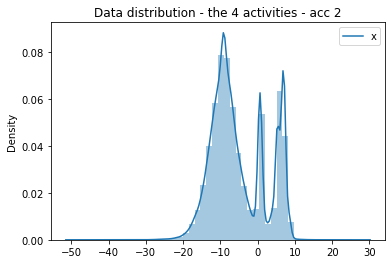

In [29]:
lim = 25
i = 0
fig, axs = plt.subplots(1,1)
sns.distplot(x_axis,ax = axs)
axs.set_title('Data distribution - the 4 activities - acc 2')
axs.legend(['x'])
#axs.set_xlim([-lim, lim])

### Reading all data Original
https://www.kaggle.com/avrahamcalev/time-series-models-pamap2-dataset

Reading in a differente way to check if there is an error in the last reading. 

In [5]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='C:\\Users\\gcram\\Documents\\Smart Sense\\Datasets\\originals\\PAMAP2\\Protocol\\subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [8]:
pama = data[['time_stamp',
             'activity_id',
             'hand_3D_acceleration_6_x',
          
             'hand_3D_acceleration_6_y',
             'hand_3D_acceleration_6_z',
             'hand_3D_gyroscope_x',
            'hand_3D_gyroscope_y',
            'hand_3D_gyroscope_z',
            'id']]

In [25]:
myPama = pama[pama['activity_id']==1] #lying
myPama =myPama.append(pama[pama['activity_id']==4])#walkin
myPama =myPama.append(pama[pama['activity_id']==12])#ascending
myPama =myPama.append(pama[pama['activity_id']==13])#descending


In [9]:
#pama = pama.sort_values(by=['time_stamp'])

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


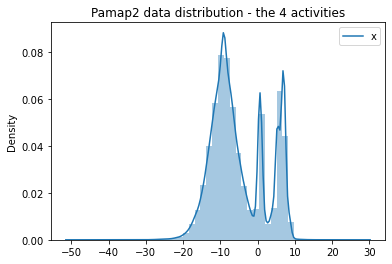

In [27]:
lim = 25
fig, axs = plt.subplots(1,1)
sns.distplot(myPama[['hand_3D_acceleration_6_x']].values.flatten(),ax = axs)
axs.set_title('Pamap2 data distribution - the 4 activities')
axs.legend(['x'])
#axs.set_xlim([-lim, lim])


#### Analysing LOSO data: Arthur processing.

In [35]:
path = "C:\\Users\\gcram\\Downloads\\"
file = os.path.join(path, 'PAMAP2P.npz')
with np.load(file,allow_pickle= True) as tmp:
    X = tmp['X'].astype('float32')
    y = np.argmax(tmp['y'],axis = 1)


In [36]:
# não dá para saber quais são as atividades... 
#pq só 12 act?
pd.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

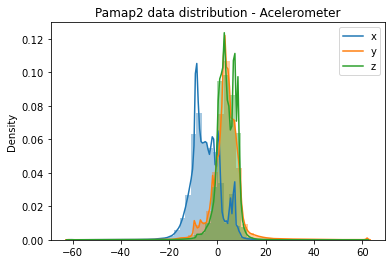

In [12]:
x_acc1 = X[:,0,:,4:7]
lim = 25
i = 0
fig, axs = plt.subplots(1,1)
sns.distplot(x_acc1[:,:,0].flatten(),ax = axs)
sns.distplot(x_acc1[:,:,1].flatten(),ax = axs)
sns.distplot(x_acc1[:,:,2].flatten(),ax = axs)
axs.set_title('Pamap2 data distribution - Acelerometer')
axs.legend(['x','y','z'])


In [11]:
X[:,0,:,4:7].max()

62.2598

### Analysing the processed Data:

In [2]:
myActNames = {
	'walking': 0,
	'walking forward': 0,
	'ascending stairs': 1,
	'walking up': 1,
	'descending stairs': 2,
	'walking down': 2,
	'lying':3,
	'lying on back':3,
	'lying on right':3,
	'laying':3,
	'sleeping':3,
	'sitting': 4,
	'standing': 5,
}
idx2Name = {
	0:'walking',
	1:'ascending stairs',
	2:'descending stairs',
	3:'lying',
}
def standarizeActName(y):
    y1 = list(map(lambda x: x.split('-')[-1], y))
    return np.array(list(map(lambda x: myActNames[x], y1)))

def readDataset(dataset_name):
    #file = os.path.join(DATA_DIR, f'{dataset_name}_f25_t2_{n_classes}actv.npz')
    file = os.path.join(DATA_DIR, f'{dataset_name}_v2.npz')
    with np.load(file, allow_pickle=True) as tmp:
        X = tmp['X'].astype('float32')
        y = tmp['y']
    Y = standarizeActName(y)
    return X[:,0,:,:],Y

In [3]:
x,y = readDataset("Pamap2")
actv = pd.value_counts(y)


In [4]:
actv

1    1555
0    1545
2    1329
3     598
dtype: int64

In [66]:
def normalize(X,Y):
    newX = []
    newY = []
    tol = 3
    m = np.array([np.mean(X[:,:, i]) for i in range(X.shape[-1])])
    std = np.array([np.std(X[:,:,i]) for i in range(X.shape[-1])])
    out_up = m + tol*std
    out_down = m - tol*std



    for sample,label in zip(X,Y):
        #check if this sample is an outlier:
        min_ = np.min(sample,axis = 0)
        max_ = np.max(sample,axis = 0)

        if ((out_up < max_) + 0).sum() + ((out_down > min_) + 0).sum() == 0:
            # normalization [-0.5, 0.5]

            new_sample = (sample - out_down)/(out_up-out_down) - 0.5
            #new_sample = (sample - m)/std
            newX.append(new_sample)
            newY.append(label)
    return np.array(newX),np.array(newY)

In [67]:
x_norm,y_norm = normalize(x,y)

In [59]:
pd.value_counts(y_norm)

1    1555
0    1545
2    1329
3     598
dtype: int64

In [6]:
sys.path.insert(0, '../')
from Utils.visualization import plot_sensor

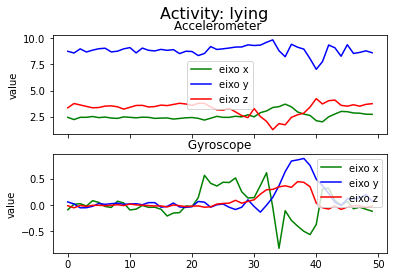

In [7]:
#filter some activity:
%matplotlib inline
act_idx = 3
x_act = x[np.where(y==act_idx)[0]]
sample = 0
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])


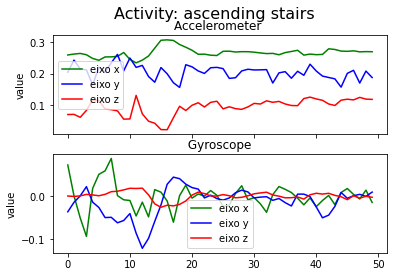

In [61]:
%matplotlib inline
act_idx = 1
x_act = x_norm[np.where(y_norm==act_idx)[0]]
sample = 0
plot_sensor(x_act[sample][None,:,:],idx2Name[act_idx])

In [52]:
x.shape

(5027, 50, 6)

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

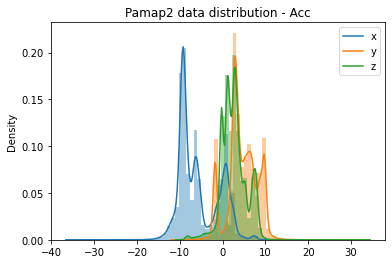

In [8]:
lim = 25
i = 0
act_idx = 3
x_act = x[np.where(y==act_idx)[0]]

fig, axs = plt.subplots(1,1)
sns.distplot(x_act[:,:,0].flatten(),ax = axs)
sns.distplot(x_act[:,:,1].flatten(),ax = axs)
sns.distplot(x_act[:,:,2].flatten(),ax = axs)
axs.set_title('Pamap2 data distribution - Acc')
axs.legend(['x','y','z'])

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

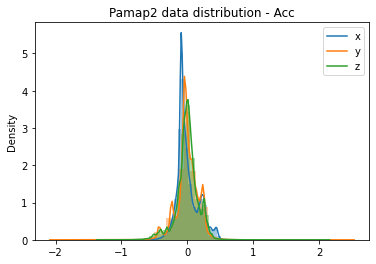

In [64]:
lim = 25
i = 0
fig, axs = plt.subplots(1,1)
sns.distplot(x_norm[:,:,0].flatten(),ax = axs)
sns.distplot(x_norm[:,:,1].flatten(),ax = axs)
sns.distplot(x_norm[:,:,2].flatten(),ax = axs)
axs.set_title('Pamap2 data distribution - Acc')
axs.legend(['x','y','z'])

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

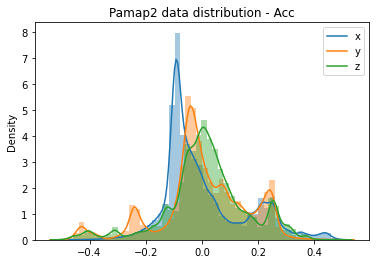

In [68]:
lim = 25
i = 0
fig, axs = plt.subplots(1,1)
sns.distplot(x_norm[:,:,0].flatten(),ax = axs)
sns.distplot(x_norm[:,:,1].flatten(),ax = axs)
sns.distplot(x_norm[:,:,2].flatten(),ax = axs)
axs.set_title('Pamap2 data distribution - Acc')
axs.legend(['x','y','z'])

Comparing with other dataset

In [44]:
other_dat = "Ucihar"
x_other,y_other = readDataset(other_dat)


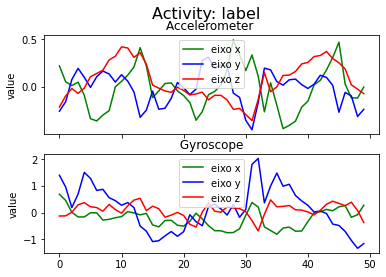

In [45]:
x_other_act = x_other[np.where(y_other==1)[0]]
sample = 5
plot_sensor(x_other_act[sample][None,:,:],)

c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gcram\miniconda3\envs\torch_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

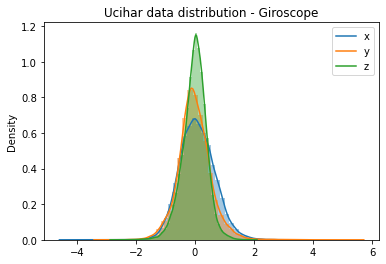

In [46]:
lim = 25
i = 0
fig, axs = plt.subplots(1,1)
sns.distplot(x_other_act[:,:,3].flatten(),ax = axs)
sns.distplot(x_other_act[:,:,4].flatten(),ax = axs)
sns.distplot(x_other_act[:,:,5].flatten(),ax = axs)
axs.set_title(f'{other_dat} data distribution - Giroscope')
axs.legend(['x','y','z'])